In [221]:
import polars as pl
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
commission = 1 / 10000.0
USE_HOUR_DATA = 0

In [222]:
import os
LOAD_FILE_NO_CALC = 1


if USE_HOUR_DATA:
    result_hour_path = "data/agg_data_hour_to_day_alpha101.parquet"
    result_hour_path = "data/agg_data_hour_to_day_all_factor.parquet"
else:
    result_hour_path = 'data/result_hour.parquet'
    result_hour_path = 'data/result_hour_alpha101.parquet'
    # result_hour_path = 'data/daily_data_agg_from_hour_sep29.parquet'
    result_hour_path = "data/day_alpha101_sep29.parquet"
    result_hour_path = 'data/all_data_1d_boris_converted_with_amihud_alpha101.parquet'
    # result_hour_path = 'data/rolling_factors.parquet'
    # result_hour_path = 'data/selected_factors_0916_0913.parquet'

INPUT_FILE_NAME = result_hour_path.split ('/')[-1].split('.')[0]

if LOAD_FILE_NO_CALC:
    if os.path.exists(result_hour_path):
        base_result_hour = pl.read_parquet(result_hour_path)
    else:
        assert 0, 'miss file'
base_result_hour

open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-11 00:00:00,"""IOUSDT""",1718064000000,1.831,4.536,1.831,4.166,2.0464e8,1718150399999,8.0061e8,2713114,1.04440714e8,4.0865e8,"""0""",2024-06-11 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,36.43783,127.525942,18.771003,210.486073,23.139702,170.234844,26.308209,180.174768,27.988478,187.438558,2.184349,191.261606,-8.569371,132.550519
2024-06-12 00:00:00,"""IOUSDT""",1718150400000,4.166,6.525,3.528,5.684,5.2548076e8,1718236799999,2.6386e9,7832422,2.6616e8,1.3363e9,"""0""",2024-06-12 23:59:59.999,36.43783,null,null,0.0,0.0,0.0,0.0,0.0,-12.948628,36.461834,-9.746657,18.771003,-7.424349,23.139702,-6.192822,26.332213,-25.105559,28.012482,-32.987333,2.208353,-32.459536,-8.545367
2024-06-13 00:00:00,"""IOUSDT""",1718236800000,5.685,6.396,4.633,4.948,3.9778e8,1718323199999,2.1594e9,6352909,1.9701e8,1.0701e9,"""0""",2024-06-13 23:59:59.999,-12.948628,null,null,0.0,0.0,0.0,0.0,0.0,3.678254,-12.96394,6.345998,-9.762533,7.760711,-7.423043,-13.965238,-6.191733,-23.019402,-25.101143,-22.413096,-32.98153,-19.401778,-32.471416
2024-06-14 00:00:00,"""IOUSDT""",1718323200000,4.948,5.448,4.45,5.13,2.7006e8,1718409599999,1.3662e9,4048758,1.3380e8,6.7733e8,"""0""",2024-06-14 23:59:59.999,3.678254,null,null,0.0,0.0,0.0,0.0,0.0,2.573099,3.678254,3.937622,6.366209,-17.017544,7.780922,-25.750487,-13.945028,-25.165692,-22.999192,-22.261209,-22.413096,-27.797271,-19.401778
2024-06-15 00:00:00,"""IOUSDT""",1718409600000,5.13,5.558,4.922,5.262,1.6000e8,1718495999999,8.3967e8,2694879,7.9526e7,4.1763e8,"""0""",2024-06-15 23:59:59.999,2.573099,null,null,0.0,0.0,0.0,0.0,0.0,1.330293,2.592593,-19.099202,3.957115,-27.613075,-16.998051,-27.042949,-25.730994,-24.211326,-25.165692,-29.608514,-22.261209,-29.437476,-27.797271
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-05-11 00:00:00,"""IDEXUSDT""",1715385600000,0.05997,0.0647,0.05988,0.06035,3.32167066e8,1715471999999,2.0807e7,187244,1.6266331e8,1.0191e7,"""0""",2024-05-11 23:59:59.999,0.63365,0.06333,9.8243e-8,0.464239,1.70721,-0.156085,0.071231,0.0,-3.032312,0.6003,-3.993372,-2.401201,-6.959403,-3.385026,-7.042254,-6.336502,null,null,null,null,null,null
2024-05-12 00:00:00,"""IDEXUSDT""",1715472000000,0.06033,0.06089,0.05811,0.05852,1.14176811e8,1715558399999,6.8288e6,83227,5.1941963e7,3.1082e6,"""0""",2024-05-12 23:59:59.999,-3.032312,0.063372,1.0446e-7,0.193893,2.045204,-0.151495,-0.151365,0.0,-0.991114,-2.98359,-4.049897,-3.961545,-4.135338,-6.895409,null,null,null,null,null,null,null,null
2024-05-13 00:00:00,"""IDEXUSDT""",1715558400000,0.05853,0.05966,0.05552,0.05794,1.09335595e8,1715644799999,6.3339e6,87643,5.2994485e7,3.0716e6,"""0""",2024-05-13 23:59:59.999,-0.991114,0.053666,8.6799e-8,0.169782,1.641818,-0.152064,-0.14403,0.0,-3.089403,-1.00803,-3.175699,-4.03212,null,null,null,null,null,null,null,null,null,null


In [223]:
# previous_result_hour = pl.read_parquet('data/result_hour.parquet')
# previous_result_hour = previous_result_hour.select(['open_time', 'symbol', 'open', 'return_skew',  'amihud', 'return_auto_corr_1_spearman_lag2'])
# # Join previous_result_hour and result_hour on symbol and open_time columns
# # Verify the new columns are added
# print(selected_result_hour.columns)

# previous_result_hour

supplement_factor_file = []
# supplement_factor_file.append (('data/result_hour.parquet', ['open', 'return_skew', 'amihud', 'return_auto_corr_1_spearman_lag2']))
# supplement_factor_file.append (('data/selected_factors_0916_0913.parquet', ['rolling_count_rank_20', 'rolling_quote_volume_market_share_pct_ewm_std_6']))

result_hour = base_result_hour

for each_file, factor_list in supplement_factor_file:
    supplement_result_hour = pl.read_parquet(each_file)
    supplement_result_hour = supplement_result_hour.select(factor_list + ['open_time', 'symbol'])
    result_hour = result_hour.join(
        supplement_result_hour,
        on=['open_time', 'symbol'],
        how='left'
    )

# # 将 open 放在第一列
# new_col_list = result_hour.columns
# new_col_list = [x for x in new_col_list if x != 'open']
# new_col_list = ['open'] + new_col_list
# result_hour = result_hour.select (new_col_list)


result_hour


open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-11 00:00:00,"""IOUSDT""",1718064000000,1.831,4.536,1.831,4.166,2.0464e8,1718150399999,8.0061e8,2713114,1.04440714e8,4.0865e8,"""0""",2024-06-11 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,36.43783,127.525942,18.771003,210.486073,23.139702,170.234844,26.308209,180.174768,27.988478,187.438558,2.184349,191.261606,-8.569371,132.550519
2024-06-12 00:00:00,"""IOUSDT""",1718150400000,4.166,6.525,3.528,5.684,5.2548076e8,1718236799999,2.6386e9,7832422,2.6616e8,1.3363e9,"""0""",2024-06-12 23:59:59.999,36.43783,null,null,0.0,0.0,0.0,0.0,0.0,-12.948628,36.461834,-9.746657,18.771003,-7.424349,23.139702,-6.192822,26.332213,-25.105559,28.012482,-32.987333,2.208353,-32.459536,-8.545367
2024-06-13 00:00:00,"""IOUSDT""",1718236800000,5.685,6.396,4.633,4.948,3.9778e8,1718323199999,2.1594e9,6352909,1.9701e8,1.0701e9,"""0""",2024-06-13 23:59:59.999,-12.948628,null,null,0.0,0.0,0.0,0.0,0.0,3.678254,-12.96394,6.345998,-9.762533,7.760711,-7.423043,-13.965238,-6.191733,-23.019402,-25.101143,-22.413096,-32.98153,-19.401778,-32.471416
2024-06-14 00:00:00,"""IOUSDT""",1718323200000,4.948,5.448,4.45,5.13,2.7006e8,1718409599999,1.3662e9,4048758,1.3380e8,6.7733e8,"""0""",2024-06-14 23:59:59.999,3.678254,null,null,0.0,0.0,0.0,0.0,0.0,2.573099,3.678254,3.937622,6.366209,-17.017544,7.780922,-25.750487,-13.945028,-25.165692,-22.999192,-22.261209,-22.413096,-27.797271,-19.401778
2024-06-15 00:00:00,"""IOUSDT""",1718409600000,5.13,5.558,4.922,5.262,1.6000e8,1718495999999,8.3967e8,2694879,7.9526e7,4.1763e8,"""0""",2024-06-15 23:59:59.999,2.573099,null,null,0.0,0.0,0.0,0.0,0.0,1.330293,2.592593,-19.099202,3.957115,-27.613075,-16.998051,-27.042949,-25.730994,-24.211326,-25.165692,-29.608514,-22.261209,-29.437476,-27.797271
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-05-11 00:00:00,"""IDEXUSDT""",1715385600000,0.05997,0.0647,0.05988,0.06035,3.32167066e8,1715471999999,2.0807e7,187244,1.6266331e8,1.0191e7,"""0""",2024-05-11 23:59:59.999,0.63365,0.06333,9.8243e-8,0.464239,1.70721,-0.156085,0.071231,0.0,-3.032312,0.6003,-3.993372,-2.401201,-6.959403,-3.385026,-7.042254,-6.336502,null,null,null,null,null,null
2024-05-12 00:00:00,"""IDEXUSDT""",1715472000000,0.06033,0.06089,0.05811,0.05852,1.14176811e8,1715558399999,6.8288e6,83227,5.1941963e7,3.1082e6,"""0""",2024-05-12 23:59:59.999,-3.032312,0.063372,1.0446e-7,0.193893,2.045204,-0.151495,-0.151365,0.0,-0.991114,-2.98359,-4.049897,-3.961545,-4.135338,-6.895409,null,null,null,null,null,null,null,null
2024-05-13 00:00:00,"""IDEXUSDT""",1715558400000,0.05853,0.05966,0.05552,0.05794,1.09335595e8,1715644799999,6.3339e6,87643,5.2994485e7,3.0716e6,"""0""",2024-05-13 23:59:59.999,-0.991114,0.053666,8.6799e-8,0.169782,1.641818,-0.152064,-0.14403,0.0,-3.089403,-1.00803,-3.175699,-4.03212,null,null,null,null,null,null,null,null,null,null


In [224]:
FACTOR_COMBINATION_LIST = ["return_skew", "amihud", "return_auto_corr_1_spearman_lag2"]
# FACTOR_COMBINATION_LIST = ['alpha54', 'alpha55']
for i in [13, 15, 16, 30, 33, 34, 35, 36, 45, 50, 51, 54, 55, 64, 71, 74, 99]:
    # for i in [44, 36, 30]:
    FACTOR_COMBINATION_LIST.append(f"alpha{i}")

FACTOR_COMBINATION_LIST = ["amihud"]
FACTOR_COMBINATION_LIST.append("rolling_count_rank_20")
FACTOR_COMBINATION_LIST.append("rolling_quote_volume_market_share_pct_ewm_std_6")

FACTOR_COMBINATION_LIST = [
    "rolling_quote_volume_market_share_pct_var_6",
    "rolling_alpha24_rank_40",
    "rolling_taker_buy_ratio_sum_6",
    "rolling_amihud_sum_40",
    "rolling_alpha24_self_cov_lag1_6",
    "rolling_alpha64_self_corr_lag1_6",
    "rolling_alpha40_skew_20",
    "rolling_alpha40_quantile_50_6",
    "rolling_alpha50_mean_20",
    "rolling_return_skew_6",
    "rolling_alpha64_self_corr_lag2_20",
    "rolling_taker_buy_ratio_zscore_40",
    "rolling_alpha46_self_cov_lag2_40",
    "rolling_alpha51_self_cov_lag2_6",
    "rolling_alpha30_zscore_6",
    "rolling_alpha55_self_cov_lag2_6",
    "rolling_alpha71_var_6",
    "rolling_alpha51_quantile_50_40",
    "rolling_alpha15_self_corr_lag2_20",
    "rolling_alpha54_ewm_var_40",
    "rolling_high_low_ratio_self_corr_lag2_20",
    "rolling_alpha54_quantile_50_40",
    "rolling_alpha45_var_40",
    "rolling_alpha24_mean_40",
    "rolling_alpha36_sum_6",
    "rolling_alpha54_rank_6",
    "rolling_alpha81_rank_6",
    "rolling_liquidity_ratio_self_corr_lag1_6",
    "rolling_alpha64_skew_6",
    "rolling_count_self_cov_lag2_40",
]


for i in [13, 15, 16, 30, 33, 34, 35, 36, 45, 50, 51, 54, 55, 64, 71, 74, 99]:
    FACTOR_COMBINATION_LIST.append(f"alpha{i}")

FACTOR_COMBINATION_LIST = ["return_skew", "amihud", "return_auto_corr_1_spearman_lag2"]
FACTOR_COMBINATION_LIST = [ "amihud", 'alpha30', 'alpha36', 'alpha40'] # this good
FACTOR_COMBINATION_LIST = [  'alpha30', 'alpha36', 'alpha45', 'alpha50']
FACTOR_COMBINATION_LIST = [ "amihud", 'alpha30', 'alpha36', 'alpha40'] # this good
FACTOR_COMBINATION_LIST = [ "amihud", 'alpha30', 'alpha36', 'alpha40', 'alpha45', 'alpha50']
FACTOR_COMBINATION_LIST = ['amihud', 'alpha30', 'alpha40']
FACTOR_COMBINATION_LIST = ['amihud', 'alpha30', 'alpha36', 'alpha45', 'alpha40', 'alpha50'] # only 2.3 sharp
FACTOR_COMBINATION_LIST = ['amihud', 'alpha30', 'alpha40', 'alpha45', 'alpha50'] # get 1.7 sharp
FACTOR_COMBINATION_LIST = ['amihud', 'alpha30', 'alpha36', 'alpha45', 'alpha40'] # get 2.7 sharp
# FACTOR_COMBINATION_LIST = ['amihud']
print(f"Factor Combination List: {FACTOR_COMBINATION_LIST}")

date_threshold = pl.datetime(2023, 1, 1)
origin_xgb_x_eval = result_hour.filter(pl.col("open_time") >= date_threshold).select(
    ["open_time", "symbol", "open", "close"] + FACTOR_COMBINATION_LIST
)
origin_xgb_x_eval

Factor Combination List: ['amihud', 'alpha30', 'alpha36', 'alpha45', 'alpha40']


open_time,symbol,open,close,amihud,alpha30,alpha36,alpha45,alpha40
datetime[ms],str,f64,f64,f64,f64,f64,f64,f64
2024-06-11 00:00:00,"""IOUSDT""",1.831,4.166,null,0.0,0.0,0.0,0.0
2024-06-12 00:00:00,"""IOUSDT""",4.166,5.684,null,0.0,0.0,0.0,0.0
2024-06-13 00:00:00,"""IOUSDT""",5.685,4.948,null,0.0,0.0,0.0,0.0
2024-06-14 00:00:00,"""IOUSDT""",4.948,5.13,null,0.0,0.0,0.0,0.0
2024-06-15 00:00:00,"""IOUSDT""",5.13,5.262,null,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…
2024-05-11 00:00:00,"""IDEXUSDT""",0.05997,0.06035,9.8243e-8,0.464239,1.70721,0.071231,-0.156085
2024-05-12 00:00:00,"""IDEXUSDT""",0.06033,0.05852,1.0446e-7,0.193893,2.045204,-0.151365,-0.151495
2024-05-13 00:00:00,"""IDEXUSDT""",0.05853,0.05794,8.6799e-8,0.169782,1.641818,-0.14403,-0.152064


In [225]:

# add future_ret in result_hour
UPDATE_POSITION_TIME = 7 # in day


# 当我们计算因子数值的时候，已经用了当前整个k线的信息，所以计算未来收益率，要基于Close来算(而不是open)
if USE_HOUR_DATA:
    for i in range(1, UPDATE_POSITION_TIME + 1):
        result_hour = result_hour.with_columns(
            ((pl.col("close").shift(-i * 24) / pl.col("close") - 1) * 100)
            .over("symbol")  # Applying the function over each symbol group
            .alias(f"close_price_fut_{i}day_ret")
            # .alias(f"future_{i}day_return")
        )
else:
    for i in range(1, UPDATE_POSITION_TIME + 1):
        result_hour = result_hour.with_columns(
            ((pl.col("close").shift(-i) / pl.col("close") - 1) * 100)
            .over("symbol")  # Applying the function over each symbol group
            # .alias(f"future_{i}day_return")
            .alias(f"close_price_fut_{i}day_ret")
        )
        result_hour = result_hour.with_columns(
            ((pl.col("open").shift(-i) / pl.col("open") - 1) * 100)
            .over("symbol")  # Applying the function over each symbol group
            .alias(f"open_price_fut_{i}day_ret")
        )

result_hour

open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-11 00:00:00,"""IOUSDT""",1718064000000,1.831,4.536,1.831,4.166,2.0464e8,1718150399999,8.0061e8,2713114,1.04440714e8,4.0865e8,"""0""",2024-06-11 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,36.43783,127.525942,18.771003,210.486073,23.139702,170.234844,26.308209,180.174768,27.988478,187.438558,2.184349,191.261606,-8.569371,132.550519
2024-06-12 00:00:00,"""IOUSDT""",1718150400000,4.166,6.525,3.528,5.684,5.2548076e8,1718236799999,2.6386e9,7832422,2.6616e8,1.3363e9,"""0""",2024-06-12 23:59:59.999,36.43783,null,null,0.0,0.0,0.0,0.0,0.0,-12.948628,36.461834,-9.746657,18.771003,-7.424349,23.139702,-6.192822,26.332213,-25.105559,28.012482,-32.987333,2.208353,-32.459536,-8.545367
2024-06-13 00:00:00,"""IOUSDT""",1718236800000,5.685,6.396,4.633,4.948,3.9778e8,1718323199999,2.1594e9,6352909,1.9701e8,1.0701e9,"""0""",2024-06-13 23:59:59.999,-12.948628,null,null,0.0,0.0,0.0,0.0,0.0,3.678254,-12.96394,6.345998,-9.762533,7.760711,-7.423043,-13.965238,-6.191733,-23.019402,-25.101143,-22.413096,-32.98153,-19.401778,-32.471416
2024-06-14 00:00:00,"""IOUSDT""",1718323200000,4.948,5.448,4.45,5.13,2.7006e8,1718409599999,1.3662e9,4048758,1.3380e8,6.7733e8,"""0""",2024-06-14 23:59:59.999,3.678254,null,null,0.0,0.0,0.0,0.0,0.0,2.573099,3.678254,3.937622,6.366209,-17.017544,7.780922,-25.750487,-13.945028,-25.165692,-22.999192,-22.261209,-22.413096,-27.797271,-19.401778
2024-06-15 00:00:00,"""IOUSDT""",1718409600000,5.13,5.558,4.922,5.262,1.6000e8,1718495999999,8.3967e8,2694879,7.9526e7,4.1763e8,"""0""",2024-06-15 23:59:59.999,2.573099,null,null,0.0,0.0,0.0,0.0,0.0,1.330293,2.592593,-19.099202,3.957115,-27.613075,-16.998051,-27.042949,-25.730994,-24.211326,-25.165692,-29.608514,-22.261209,-29.437476,-27.797271
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-05-11 00:00:00,"""IDEXUSDT""",1715385600000,0.05997,0.0647,0.05988,0.06035,3.32167066e8,1715471999999,2.0807e7,187244,1.6266331e8,1.0191e7,"""0""",2024-05-11 23:59:59.999,0.63365,0.06333,9.8243e-8,0.464239,1.70721,-0.156085,0.071231,0.0,-3.032312,0.6003,-3.993372,-2.401201,-6.959403,-3.385026,-7.042254,-6.336502,null,null,null,null,null,null
2024-05-12 00:00:00,"""IDEXUSDT""",1715472000000,0.06033,0.06089,0.05811,0.05852,1.14176811e8,1715558399999,6.8288e6,83227,5.1941963e7,3.1082e6,"""0""",2024-05-12 23:59:59.999,-3.032312,0.063372,1.0446e-7,0.193893,2.045204,-0.151495,-0.151365,0.0,-0.991114,-2.98359,-4.049897,-3.961545,-4.135338,-6.895409,null,null,null,null,null,null,null,null
2024-05-13 00:00:00,"""IDEXUSDT""",1715558400000,0.05853,0.05966,0.05552,0.05794,1.09335595e8,1715644799999,6.3339e6,87643,5.2994485e7,3.0716e6,"""0""",2024-05-13 23:59:59.999,-0.991114,0.053666,8.6799e-8,0.169782,1.641818,-0.152064,-0.14403,0.0,-3.089403,-1.00803,-3.175699,-4.03212,null,null,null,null,null,null,null,null,null,null


In [226]:
result_hour.filter ((pl.col ('close_price_fut_7day_ret').is_null()) & (pl.col ('symbol') == 'ANTUSDT'))

open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-03-26 00:00:00,"""ANTUSDT""",1711411200000,9.103,9.315,8.964,9.091,340458.3,1711497599999,3.1150e6,43748,162656.7,1.4887e6,"""0""",2024-03-26 23:59:59.999,-0.109878,0.041428,7.8793e-7,0.150059,4.007218,0.032898,-0.155925,-0.847701,-2.397976,-0.098869,-0.538995,-2.537625,-2.04598,-0.681094,-2.188978,-2.186092,1.440986,-2.317917,-1.935981,1.351203,null,null
2024-03-27 00:00:00,"""ANTUSDT""",1711497600000,9.094,9.28,8.745,8.873,462771.9,1711583999999,4.1611e6,48249,242042.0,2.1765e6,"""0""",2024-03-27 23:59:59.999,-2.397976,0.040985,7.8961e-7,0.157653,4.349518,0.068337,0.012571,-0.875,1.904655,-2.44117,0.360645,-0.582802,0.214133,-2.08929,3.933281,-2.221245,0.473346,1.451506,null,null,null,null
2024-03-28 00:00:00,"""ANTUSDT""",1711584000000,8.872,9.156,8.783,9.042,403731.5,1711670399999,3.6440e6,45676,188425.1,1.7000e6,"""0""",2024-03-28 23:59:59.999,1.904655,0.041249,7.7050e-7,0.144609,3.54362,0.064317,0.17599,-0.876506,-1.515152,1.904869,-1.658925,0.360685,1.99071,0.225428,-1.404557,3.990081,null,null,null,null,null,null
2024-03-29 00:00:00,"""ANTUSDT""",1711670400000,9.041,9.1,8.798,8.905,333792.0,1711756799999,2.9836e6,43755,166957.4,1.4921e6,"""0""",2024-03-29 23:59:59.999,-1.515152,0.041232,6.5406e-7,0.11367,3.902617,0.054273,-0.176148,-0.876506,-0.145985,-1.515319,3.559798,-1.648048,0.112296,2.046234,null,null,null,null,null,null,null,null
2024-03-30 00:00:00,"""ANTUSDT""",1711756800000,8.904,9.051,8.794,8.892,343991.7,1711843199999,3.0700e6,48432,163338.7,1.4580e6,"""0""",2024-03-30 23:59:59.999,-0.145985,0.040591,4.7219e-7,0.100942,3.358897,-0.131177,0.374314,-0.876506,3.711201,-0.134771,0.258659,3.616352,null,null,null,null,null,null,null,null,null,null
2024-03-31 00:00:00,"""ANTUSDT""",1711843200000,8.892,9.274,8.881,9.222,424799.6,1711929599999,3.8821e6,50778,210081.8,1.9203e6,"""0""",2024-03-31 23:59:59.999,3.711201,0.040505,5.8003e-7,0.128232,2.613074,-0.142938,-0.327132,-0.876506,-3.328996,3.756185,null,null,null,null,null,null,null,null,null,null,null,null
2024-04-01 00:00:00,"""ANTUSDT""",1711929600000,9.226,9.24,8.832,8.915,244045.0,1712015999999,2.2030e6,22847,110275.1,994825.5625,"""0""",2024-04-01 23:59:59.999,-3.328996,0.040782,5.9228e-7,0.09506,3.582298,-0.10687,-0.082417,-0.876506,null,null,null,null,null,null,null,null,null,null,null,null,null,null


## 因子组合
### Fama-Macbeth 线性组合

In [227]:
import statsmodels.api as sm
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

def count_null_inf_polars(df: pl.DataFrame):
    # Count null values
    null_counts = df.null_count().sum()
    
    # Count infinity values
    # inf_counts = df.select(
    #     pl.sum(pl.col('*').is_infinite().cast(pl.Int64))
    # ).item()
    inf_counts = 0
    
    return null_counts, inf_counts

def fama_macbeth_get_factor_weight (x_train, y_train, update_pos_days, symbol_num, factor_num):
    factor_weight_sum = np.zeros((symbol_num, factor_num))

    # print (f'input {x_train}')

    # null_count, inf_count = count_null_inf_polars(x_train)
    # print(f"x_train contains {null_count} null values and {inf_count} infinity values")

    # Drop rows containing any null values
    x_train = x_train.drop_nulls()

    # result_hour = result_hour.sort(["symbol", "open_time"])
    total_weights_sum = np.zeros(factor_num)
    # unique_times = result_hour.select

    unique_times = x_train.select (pl.col("open_time").sort()).unique().to_numpy()

    constant_sum = 0.0

    for each_time in unique_times:
        cur_y_column_name = f"close_price_fut_{update_pos_days}day_ret"
        slice_data = x_train.filter(pl.col("open_time") == each_time).fill_nan(0)

        # print (f'temp debug {each_time} {slice_data.shape} == {slice_data.columns} == {slice_data}')

        X = slice_data[FACTOR_COMBINATION_LIST].to_numpy()
        X = sm.add_constant(X)  # 添加常数项（截距项）
        y = slice_data[cur_y_column_name].to_numpy()

        model = sm.OLS(y, X)
        results = model.fit()
        weights = results.params[1:]
        constant_sum += results.params[0] # constant term

        while weights.shape[0] < total_weights_sum.shape[0]: # TODO, debug here, should not use this
            weights = np.append(weights, 0)
            # print (each_time)

        total_weights_sum += weights
    # print ('before divide ', total_weights_sum, len (unique_times))
    total_weights_sum /= len (unique_times)
    avg_const_term = constant_sum / len (unique_times)
    total_weights_sum

    # for i, weight in enumerate(total_weights_sum):
    #     print (f'{i} === {FACTOR_COMBINATION_LIST[i]} ==== {weight:.4f}')

    # 计算因子相关性矩阵
    factor_data = result_hour[FACTOR_COMBINATION_LIST].fill_nan(0)
    # print (factor_data)
    correlation_matrix = factor_data.corr()
    # print (correlation_matrix)

    # 绘制相关性矩阵的热图
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix between Factors for {update_pos_days}day')
    plt.show()

    # print (f'total weights sum {total_weights_sum}')
    weighted_factors = [x_train[col] * weight for col, weight in zip(FACTOR_COMBINATION_LIST, total_weights_sum)]
    # print (f'weight factors: {weighted_factors}')
    # return weighted_factors
    return total_weights_sum, avg_const_term


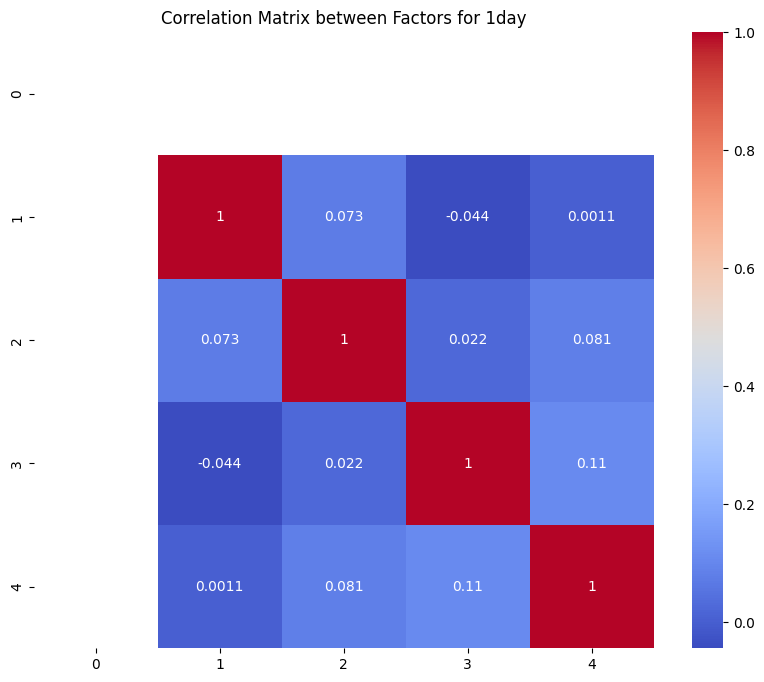

returned weight factor for 1 day:  [ 7.22474261e+05  1.57947231e+00  1.37643264e-02 -5.85353660e-02
  1.29668051e-01] -0.10164595656739504


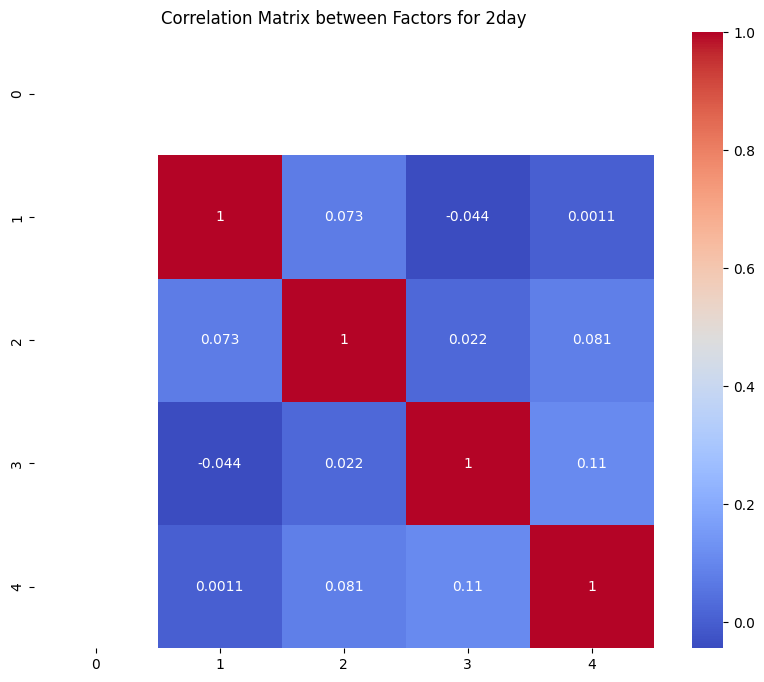

returned weight factor for 2 day:  [ 1.39538966e+06  2.32862578e+00  3.68336521e-02 -6.11968901e-02
  2.82068713e-01] -0.15341339190811562


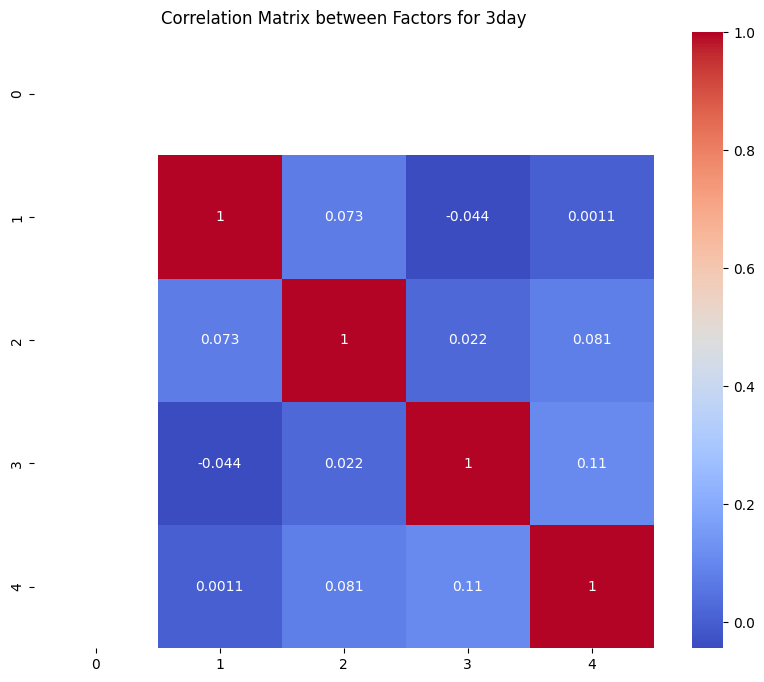

returned weight factor for 3 day:  [ 1.75644909e+06  2.22721616e+00  4.40927527e-02 -1.77586104e-01
  5.12602846e-01] -0.045132124093071706


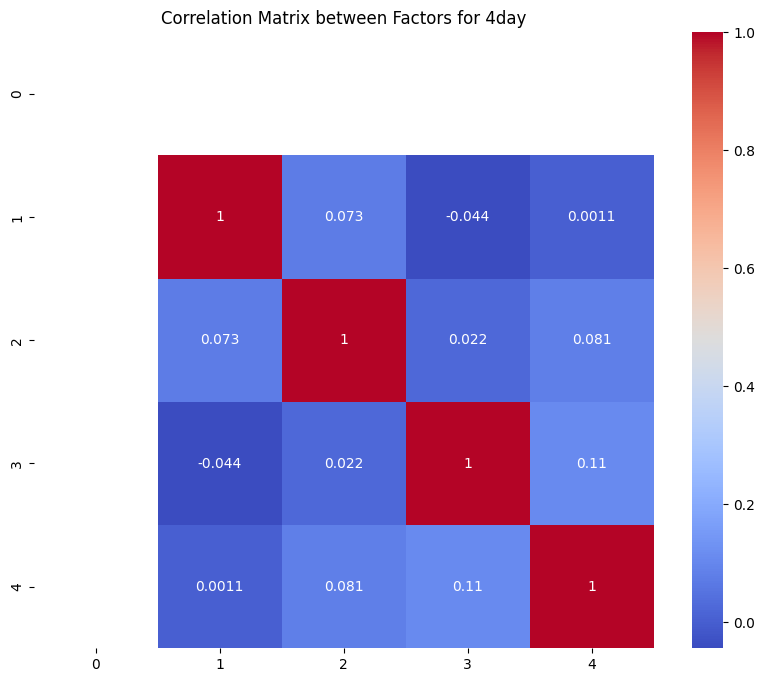

returned weight factor for 4 day:  [ 2.05834961e+06  1.98337442e+00  5.97649339e-02 -2.84555592e-01
  7.85792557e-01] 0.08338228434900648


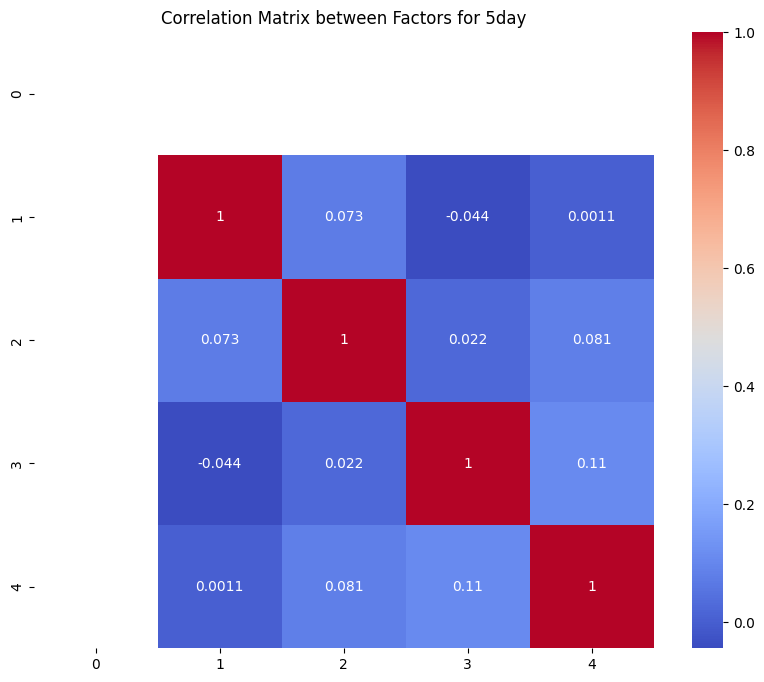

returned weight factor for 5 day:  [ 2.41203709e+06  1.73160953e+00  7.87609422e-02 -2.73233735e-01
  1.08261766e+00] 0.2174524688954413


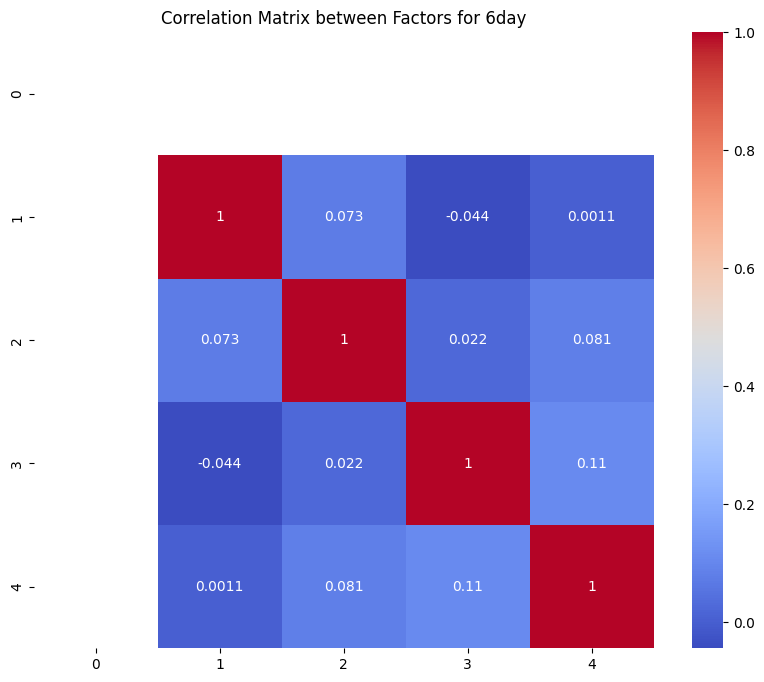

returned weight factor for 6 day:  [ 2.74438705e+06  1.63876008e+00  8.49592063e-02 -3.94191341e-01
  1.45548702e+00] 0.33644294418914983


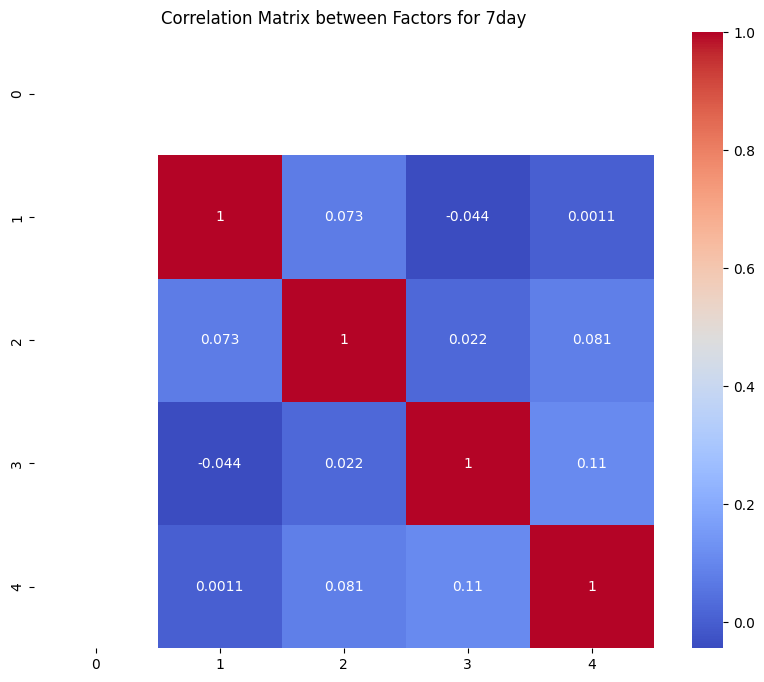

returned weight factor for 7 day:  [ 3.21333291e+06  1.88119924e+00  9.35347621e-02 -2.62902901e-01
  1.84270949e+00] 0.4224628816406963


open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret,linear_compound_factor_1day,linear_compound_factor_2day,linear_compound_factor_3day,linear_compound_factor_4day,linear_compound_factor_5day,linear_compound_factor_6day,linear_compound_factor_7day
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-11 00:00:00,"""IOUSDT""",1718064000000,1.831,4.536,1.831,4.166,2.0464e8,1718150399999,8.0061e8,2713114,1.04440714e8,4.0865e8,"""0""",2024-06-11 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,36.43783,127.525942,18.771003,210.486073,23.139702,170.234844,26.308209,180.174768,27.988478,187.438558,2.184349,191.261606,-8.569371,132.550519,null,null,null,null,null,null,null
2024-06-12 00:00:00,"""IOUSDT""",1718150400000,4.166,6.525,3.528,5.684,5.2548076e8,1718236799999,2.6386e9,7832422,2.6616e8,1.3363e9,"""0""",2024-06-12 23:59:59.999,36.43783,null,null,0.0,0.0,0.0,0.0,0.0,-12.948628,36.461834,-9.746657,18.771003,-7.424349,23.139702,-6.192822,26.332213,-25.105559,28.012482,-32.987333,2.208353,-32.459536,-8.545367,null,null,null,null,null,null,null
2024-06-13 00:00:00,"""IOUSDT""",1718236800000,5.685,6.396,4.633,4.948,3.9778e8,1718323199999,2.1594e9,6352909,1.9701e8,1.0701e9,"""0""",2024-06-13 23:59:59.999,-12.948628,null,null,0.0,0.0,0.0,0.0,0.0,3.678254,-12.96394,6.345998,-9.762533,7.760711,-7.423043,-13.965238,-6.191733,-23.019402,-25.101143,-22.413096,-32.98153,-19.401778,-32.471416,null,null,null,null,null,null,null
2024-06-14 00:00:00,"""IOUSDT""",1718323200000,4.948,5.448,4.45,5.13,2.7006e8,1718409599999,1.3662e9,4048758,1.3380e8,6.7733e8,"""0""",2024-06-14 23:59:59.999,3.678254,null,null,0.0,0.0,0.0,0.0,0.0,2.573099,3.678254,3.937622,6.366209,-17.017544,7.780922,-25.750487,-13.945028,-25.165692,-22.999192,-22.261209,-22.413096,-27.797271,-19.401778,null,null,null,null,null,null,null
2024-06-15 00:00:00,"""IOUSDT""",1718409600000,5.13,5.558,4.922,5.262,1.6000e8,1718495999999,8.3967e8,2694879,7.9526e7,4.1763e8,"""0""",2024-06-15 23:59:59.999,2.573099,null,null,0.0,0.0,0.0,0.0,0.0,1.330293,2.592593,-19.099202,3.957115,-27.613075,-16.998051,-27.042949,-25.730994,-24.211326,-25.165692,-29.608514,-22.261209,-29.437476,-27.797271,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-05-11 00:00:00,"""IDEXUSDT""",1715385600000,0.05997,0.0647,0.05988,0.06035,3.32167066e8,1715471999999,2.0807e7,187244,1.6266331e8,1.0191e7,"""0""",2024-05-11 23:59:59.999,0.63365,0.06333,9.8243e-8,0.464239,1.70721,-0.156085,0.071231,0.0,-3.032312,0.6003,-3.993372,-2.401201,-6.959403,-3.385026,-7.042254,-6.336502,null,null,null,null,null,null,0.701674,1.07921,1.144004,1.165473,null,null,null
2024-05-12 00:00:00,"""IDEXUSDT""",1715472000000,0.06033,0.06089,0.05811,0.05852,1.14176811e8,1715558399999,6.8288e6,83227,5.1941963e7,3.1082e6,"""0""",2024-05-12 23:59:59.999,-3.032312,0.063372,1.0446e-7,0.193893,2.045204,-0.151495,-0.151365,0.0,-0.991114,-2.98359,-4.049897,-3.961545,-4.135338,-6.895409,null,null,null,null,null,null,null,null,0.297437,0.485712,0.609585,null,null,null,null
2024-05-13 00:00:00,"""IDEXUSDT""",1715558400000,0.05853,0.05966,0.05552,0.05794,1.09335595e8,1715644799999,6.3339e6,87643,5.2994485e7,3.0716e6,"""0""",2024-05-13 23:59:59.999,-0.991114,0.053666,8.6799e-8,0.169782,1.641818,-0.152064,-0.14403,0.0,-3.089403,-1.0080

In [228]:
factor_num = len(FACTOR_COMBINATION_LIST)
# symbol_num = len(ret.columns) - 1
symbol_num = result_hour["symbol"].n_unique()

final_result_hour = result_hour.clone()

# for cur_update_position_time in range(7, UPDATE_POSITION_TIME + 1):
for cur_update_position_time in range(1, UPDATE_POSITION_TIME + 1):
    # for cur_update_position_time in range(UPDATE_POSITION_TIME, UPDATE_POSITION_TIME + 1):
    # prepare input
    cur_fut_ret_column_name = f"close_price_fut_{cur_update_position_time}day_ret"
    non_nan_result_hour = result_hour.filter(
        (pl.col(cur_fut_ret_column_name).is_not_nan())
        & (pl.col(cur_fut_ret_column_name).is_not_null())
    )
    non_nan_result_hour = non_nan_result_hour.sort(["open_time", "symbol"])

    # # temp for test
    # ant = non_nan_result_hour.filter(pl.col("symbol") == "ANTUSDT")
    # print(f"temp test for update {cur_update_position_time} day: ", ant)

    non_nan_linear_x = non_nan_result_hour.select(
        ["open_time", "symbol", cur_fut_ret_column_name]
        + FACTOR_COMBINATION_LIST
    )
    non_nan_linear_y = non_nan_result_hour.select(cur_fut_ret_column_name)

    # print ('non_nan_linear_x: ', non_nan_linear_x)
    # print (f'min date: {non_nan_linear_x["open_time"].min()} == max date: {non_nan_linear_x["open_time"].max()}')

    linear_x_train = non_nan_linear_x.filter(pl.col("open_time") < date_threshold)
    linear_x_eval = non_nan_linear_x.filter(pl.col("open_time") >= date_threshold)

    train_size = linear_x_train.height
    eval_size = linear_x_eval.height
    ratio = (
        train_size / eval_size if eval_size > 0 else float("inf")
    )  # Avoid division by zero

    linear_y_train = non_nan_linear_y.head(train_size)
    linear_y_eval = non_nan_linear_y.tail(non_nan_linear_y.height - train_size)

    weighted_factors, const_term = fama_macbeth_get_factor_weight(
        linear_x_train,
        linear_y_train,
        cur_update_position_time,
        symbol_num=symbol_num,
        factor_num=factor_num,
    )

    print( f"returned weight factor for {cur_update_position_time} day: ", weighted_factors, const_term)

    weighted_sum_expr = pl.lit(const_term)  # Start with the const term, then sum all factors
    for factor, weight in zip(FACTOR_COMBINATION_LIST, weighted_factors):
        weighted_sum_expr += pl.col(factor) * weight

    # origin_xgb_x_eval = origin_xgb_x_eval.with_columns(
    final_result_hour = final_result_hour.with_columns(
        pl.when(pl.col(cur_fut_ret_column_name).is_null())
        .then(pl.lit(None))
        .otherwise(weighted_sum_expr)
        .alias(f"linear_compound_factor_{cur_update_position_time}day")
    )

final_result_hour

In [229]:

# vol = talib.STDDEV(self.candles['收盘价'] / self.candles["收盘价"].shift() - 1, 20*15)
import talib
import numpy as np


final_result_hour = final_result_hour.sort ('open_time')

# Calculate volatility using Polars rolling function
# final_result_hour = final_result_hour.with_columns([
#     pl.col("open")
#     .pct_change()
#     .rolling_std(window_size=30)
#     .alias("open_price_volatility")
# ])

def calculate_volatility(group):
    print (group)
    return group.with_columns([
        pl.col("open")
        .pct_change()
        .rolling_std(window_size=30)
        .alias("open_price_volatility")
    ])

final_result_hour = final_result_hour.group_by("symbol").map_groups (calculate_volatility)

final_result_hour 

shape: (496, 44)
┌────────────┬──────────┬────────────┬────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ open_time  ┆ symbol   ┆ open_time_ ┆ open   ┆ … ┆ linear_com ┆ linear_co ┆ linear_co ┆ linear_co │
│ ---        ┆ ---      ┆ ms         ┆ ---    ┆   ┆ pound_fact ┆ mpound_fa ┆ mpound_fa ┆ mpound_fa │
│ datetime[m ┆ str      ┆ ---        ┆ f64    ┆   ┆ or_4day    ┆ ctor_5day ┆ ctor_6day ┆ ctor_7day │
│ s]         ┆          ┆ i64        ┆        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆          ┆            ┆        ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪══════════╪════════════╪════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2023-02-16 ┆ AGIXUSDT ┆ 1676505600 ┆ 0.4465 ┆ … ┆ null       ┆ null      ┆ null      ┆ null      │
│ 00:00:00   ┆          ┆ 000        ┆        ┆   ┆            ┆           ┆           ┆           │
│ 2023-02-17 ┆ AGIXUSDT ┆ 1676592000 ┆ 0.4045 ┆ … ┆ null       ┆ null     

open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret,linear_compound_factor_1day,linear_compound_factor_2day,linear_compound_factor_3day,linear_compound_factor_4day,linear_compound_factor_5day,linear_compound_factor_6day,linear_compound_factor_7day
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-02-16 00:00:00,"""AGIXUSDT""",1676505600000,0.4465,0.47,0.3978,0.4044,3.8639133e7,1676591999999,1.7015e7,88287,1.5875132e7,6.9650e6,"""0""",2023-02-16 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,8.160237,-9.406495,3.857567,-1.993281,-0.964392,-5.957447,-3.758655,-10.302352,3.907023,-12.81075,-1.088032,-5.912654,-0.568744,-10.43673,null,null,null,null,null,null,null
2023-02-17 00:00:00,"""AGIXUSDT""",1676592000000,0.4045,0.446,0.4028,0.4374,8.2911909e7,1676678399999,3.5855e7,208173,3.634309e7,1.5723e7,"""0""",2023-02-17 23:59:59.999,8.160237,null,null,0.0,0.0,0.0,0.0,0.0,-3.978052,8.182942,-8.436214,3.807169,-11.019662,-0.988875,-3.932327,-3.757726,-8.550526,3.856613,-8.070416,-1.137206,2.286237,-0.618047,null,null,null,null,null,null,null
2023-02-18 00:00:00,"""AGIXUSDT""",1676678400000,0.4376,0.4633,0.39,0.42,7.0503952e7,1676764799999,3.0672e7,155053,3.0576917e7,1.3328e7,"""0""",2023-02-18 23:59:59.999,-3.978052,null,null,0.0,0.0,0.0,0.0,0.0,-4.642857,-4.04479,-7.333333,-8.478062,0.047619,-11.037477,-4.761905,-3.999086,-4.261905,-8.615174,6.52381,-8.135283,-3.571429,2.216636,null,null,null,null,null,null,null
2023-02-19 00:00:00,"""AGIXUSDT""",1676764800000,0.4199,0.4321,0.391,0.4005,7.2165008e7,1676851199999,2.9965e7,156308,3.0593582e7,1.2710e7,"""0""",2023-02-19 23:59:59.999,-4.642857,null,null,0.0,0.0,0.0,0.0,0.0,-2.821473,-4.620148,4.918851,-7.287449,-0.124844,0.04763,0.399501,-4.763039,11.710362,-4.26292,1.123596,6.525363,3.995006,-3.548464,null,null,null,null,null,null,null
2023-02-20 00:00:00,"""AGIXUSDT""",1676851200000,0.4005,0.411,0.3774,0.3892,9.4144937e7,1676937599999,3.6916e7,168579,4.063331e7,1.5941e7,"""0""",2023-02-20 23:59:59.999,-2.821473,null,null,0.0,0.0,0.0,0.0,0.0,7.965057,-2.796504,2.774923,4.893883,3.314491,-0.149813,14.953751,0.374532,4.059609,11.685393,7.014388,1.123596,13.77184,3.995006,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-09-26 00:00:00,"""SPELLUSDT""",1727308800000,0.0005704,0.000595,0.0005611,0.0005931,1.0677e10,1727395199999,6.2207e6,56131,5.2452e9,3.0568e6,"""0""",2024-09-26 23:59:59.999,3.979663,0.030642,4.6362e-7,0.166134,2.834998,-0.00235,0.004979,0.0,4.737818,3.962132,3.439555,8.906031,5.496544,7.556101,5.867476,9.659888,null,null,null,null,null,null,0.534139,0.98384,1.262127,1.533355,null,null,null
2024-09-27 00:00:00,"""SPELLUSDT""",1727395200000,0.000593,0.0006425,0.0005922,0.0006212,2.0537e10,1727481599999,1.2787e7,96956,9.7388e9,6.0629e6,"""0""",2024-09-27 23:59:59.999,4.737818,0.029599,4.1983e-7,0.184273,2.55123,-0.004969,-0.002236,0.0,-1.239536,4.755481,0.724404,3.456998,1.078558,5.480607,null,null,null,null,null,null,null,null,0.527325,0.954219,1.21303,null,null,null,null
2024-09-28 00:00:00,"""SPELLUSDT""",1727481600000,0.0006212,0.0006308,0.0005945,0.0006135,8.5713e9,1727567999999,5.2478e6,47570,4.2367e9,2.5946e6,"""0""",2024-09-28 23:59:59.999,-1.239536,0.03058,3.9947e-7,0.150352,2.450245,-0.001534,-0.005247,0.0,1.98859,-1.239536,2.347188,0.69

In [230]:
if USE_HOUR_DATA:
    # origin_xgb_x_eval.write_parquet('data/linear_compound_factor_hour_data.parquet')
    path = 'data/linear_compound_factor_hour_data.parquet'
    # zero_clock_origin_xgb_x_eval = origin_xgb_x_eval.filter(pl.col("open_time").dt.hour() == 0)
    # zero_clock_origin_xgb_x_eval.write_parquet('data/linear_compound_factor_hour_zero_clock.parquet')
else:
    path = f'data/linear_compound_factor_input_{INPUT_FILE_NAME}.parquet'
print (f'path {path}')
# final_result_hour.write_parquet(path)
final_result_hour.filter (pl.col ('open_time') >= date_threshold).write_parquet (path)
print (f'write into {path}')

final_result_hour

path data/linear_compound_factor_input_all_data_1d_boris_converted_with_amihud_alpha101.parquet
write into data/linear_compound_factor_input_all_data_1d_boris_converted_with_amihud_alpha101.parquet


open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret,linear_compound_factor_1day,linear_compound_factor_2day,linear_compound_factor_3day,linear_compound_factor_4day,linear_compound_factor_5day,linear_compound_factor_6day,linear_compound_factor_7day
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-02-16 00:00:00,"""AGIXUSDT""",1676505600000,0.4465,0.47,0.3978,0.4044,3.8639133e7,1676591999999,1.7015e7,88287,1.5875132e7,6.9650e6,"""0""",2023-02-16 23:59:59.999,null,null,null,0.0,0.0,0.0,0.0,0.0,8.160237,-9.406495,3.857567,-1.993281,-0.964392,-5.957447,-3.758655,-10.302352,3.907023,-12.81075,-1.088032,-5.912654,-0.568744,-10.43673,null,null,null,null,null,null,null
2023-02-17 00:00:00,"""AGIXUSDT""",1676592000000,0.4045,0.446,0.4028,0.4374,8.2911909e7,1676678399999,3.5855e7,208173,3.634309e7,1.5723e7,"""0""",2023-02-17 23:59:59.999,8.160237,null,null,0.0,0.0,0.0,0.0,0.0,-3.978052,8.182942,-8.436214,3.807169,-11.019662,-0.988875,-3.932327,-3.757726,-8.550526,3.856613,-8.070416,-1.137206,2.286237,-0.618047,null,null,null,null,null,null,null
2023-02-18 00:00:00,"""AGIXUSDT""",1676678400000,0.4376,0.4633,0.39,0.42,7.0503952e7,1676764799999,3.0672e7,155053,3.0576917e7,1.3328e7,"""0""",2023-02-18 23:59:59.999,-3.978052,null,null,0.0,0.0,0.0,0.0,0.0,-4.642857,-4.04479,-7.333333,-8.478062,0.047619,-11.037477,-4.761905,-3.999086,-4.261905,-8.615174,6.52381,-8.135283,-3.571429,2.216636,null,null,null,null,null,null,null
2023-02-19 00:00:00,"""AGIXUSDT""",1676764800000,0.4199,0.4321,0.391,0.4005,7.2165008e7,1676851199999,2.9965e7,156308,3.0593582e7,1.2710e7,"""0""",2023-02-19 23:59:59.999,-4.642857,null,null,0.0,0.0,0.0,0.0,0.0,-2.821473,-4.620148,4.918851,-7.287449,-0.124844,0.04763,0.399501,-4.763039,11.710362,-4.26292,1.123596,6.525363,3.995006,-3.548464,null,null,null,null,null,null,null
2023-02-20 00:00:00,"""AGIXUSDT""",1676851200000,0.4005,0.411,0.3774,0.3892,9.4144937e7,1676937599999,3.6916e7,168579,4.063331e7,1.5941e7,"""0""",2023-02-20 23:59:59.999,-2.821473,null,null,0.0,0.0,0.0,0.0,0.0,7.965057,-2.796504,2.774923,4.893883,3.314491,-0.149813,14.953751,0.374532,4.059609,11.685393,7.014388,1.123596,13.77184,3.995006,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-09-26 00:00:00,"""SPELLUSDT""",1727308800000,0.0005704,0.000595,0.0005611,0.0005931,1.0677e10,1727395199999,6.2207e6,56131,5.2452e9,3.0568e6,"""0""",2024-09-26 23:59:59.999,3.979663,0.030642,4.6362e-7,0.166134,2.834998,-0.00235,0.004979,0.0,4.737818,3.962132,3.439555,8.906031,5.496544,7.556101,5.867476,9.659888,null,null,null,null,null,null,0.534139,0.98384,1.262127,1.533355,null,null,null
2024-09-27 00:00:00,"""SPELLUSDT""",1727395200000,0.000593,0.0006425,0.0005922,0.0006212,2.0537e10,1727481599999,1.2787e7,96956,9.7388e9,6.0629e6,"""0""",2024-09-27 23:59:59.999,4.737818,0.029599,4.1983e-7,0.184273,2.55123,-0.004969,-0.002236,0.0,-1.239536,4.755481,0.724404,3.456998,1.078558,5.480607,null,null,null,null,null,null,null,null,0.527325,0.954219,1.21303,null,null,null,null
2024-09-28 00:00:00,"""SPELLUSDT""",1727481600000,0.0006212,0.0006308,0.0005945,0.0006135,8.5713e9,1727567999999,5.2478e6,47570,4.2367e9,2.5946e6,"""0""",2024-09-28 23:59:59.999,-1.239536,0.03058,3.9947e-7,0.150352,2.450245,-0.001534,-0.005247,0.0,1.98859,-1.239536,2.347188,0.69

In [231]:
cur_symbol = 'DEFIUSDT'
final_result_hour.filter(pl.col('symbol') == cur_symbol).sort('open_time').filter (pl.col ('linear_compound_factor_7day').is_not_null())
final_result_hour.filter(pl.col('symbol') == cur_symbol).sort('open_time').filter (pl.col ('close_price_fut_3day_ret').is_not_null()).select (
    pl.col (['open_time', 'open', 'close_price_fut_3day_ret', 'close_price_fut_7day_ret','linear_compound_factor_7day'])
)

open_time,open,close_price_fut_3day_ret,close_price_fut_7day_ret,linear_compound_factor_7day
datetime[ms],f64,f64,f64,f64
2021-01-01 00:00:00,650.6,16.500604,36.56401,null
2021-01-02 00:00:00,662.6,27.410862,51.587182,null
2021-01-03 00:00:00,665.1,21.417134,29.543635,null
2021-01-04 00:00:00,749.6,15.887003,10.7166,null
2021-01-05 00:00:00,771.9,6.813083,3.034597,null
…,…,…,…,…
2024-09-23 00:00:00,706.3,4.171813,3.62289,11.057333
2024-09-24 00:00:00,728.6,5.014153,null,null
2024-09-25 00:00:00,742.2,5.050505,null,null


In [232]:
final_result_hour.filter(pl.col('symbol') == 'BICOUSDT').sort('open_time')
final_result_hour.filter(pl.col('symbol') == 'BICOUSDT').sort('open_time').filter (
    # pl.col ('open_price_volatility').is_not_null()
    pl.col ('open_time') > pl.datetime(2024, 3, 27)
)

open_time,symbol,open_time_ms,open,high,low,close,volume,close_time_ms,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,close_time,return,open_price_volatility,amihud,alpha30,alpha36,alpha40,alpha45,alpha50,close_price_fut_1day_ret,open_price_fut_1day_ret,close_price_fut_2day_ret,open_price_fut_2day_ret,close_price_fut_3day_ret,open_price_fut_3day_ret,close_price_fut_4day_ret,open_price_fut_4day_ret,close_price_fut_5day_ret,open_price_fut_5day_ret,close_price_fut_6day_ret,open_price_fut_6day_ret,close_price_fut_7day_ret,open_price_fut_7day_ret,linear_compound_factor_1day,linear_compound_factor_2day,linear_compound_factor_3day,linear_compound_factor_4day,linear_compound_factor_5day,linear_compound_factor_6day,linear_compound_factor_7day
datetime[ms],str,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,str,datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-03-28 00:00:00,"""BICOUSDT""",1711584000000,0.5478,0.6688,0.5316,0.6395,1.17691265e8,1711670399999,7.1117e7,520705,5.8946799e7,3.5606e7,"""0""",2024-03-28 23:59:59.999,16.718379,0.07293,3.1549e-7,0.103684,0.0,-0.355052,-0.244351,0.0,4.972635,16.776196,1.376075,22.508215,4.331509,18.327857,13.479281,21.796276,14.761532,32.475356,27.443315,33.990507,13.150899,48.776926,0.258317,0.443062,0.601327,0.728946,0.840342,0.951726,1.041265
2024-03-29 00:00:00,"""BICOUSDT""",1711670400000,0.6397,0.7162,0.6,0.6713,1.87876209e8,1711756799999,1.2398e8,780594,9.3907818e7,6.2021e7,"""0""",2024-03-29 23:59:59.999,4.972635,0.078072,1.7647e-7,0.088641,0.0,-0.478698,-0.37254,0.0,-3.426188,4.908551,-0.610755,1.328748,8.103679,4.29889,9.32519,13.443802,21.406227,14.741285,7.790854,27.40347,-9.503948,13.115523,0.125586,0.187008,0.283018,0.352268,0.380128,0.416106,0.372096
2024-03-30 00:00:00,"""BICOUSDT""",1711756800000,0.6711,0.685,0.6387,0.6483,4.7547136e7,1711843199999,3.1189e7,229959,2.2891933e7,1.5020e7,"""0""",2024-03-30 23:59:59.999,-3.426188,0.07807,1.4165e-7,0.101562,0.0,-0.446493,-0.347496,0.0,2.915317,-3.412308,11.938917,-0.581135,13.203764,8.135896,25.713404,9.372672,11.614993,21.442408,-6.293383,7.822977,16.751504,-9.476978,0.123548,0.17606,0.262697,0.324403,0.346537,0.378722,0.337274
2024-03-31 00:00:00,"""BICOUSDT""",1711843200000,0.6482,0.6968,0.6452,0.6672,5.2468903e7,1711929599999,3.5350e7,304872,2.5511779e7,1.7175e7,"""0""",2024-03-31 23:59:59.999,2.915317,0.078552,1.3886e-7,0.125551,0.0,-0.411702,-0.231664,0.0,8.767986,2.931194,9.997002,11.956186,22.152278,13.236655,8.453237,25.732799,-8.947842,11.632212,13.444245,-6.278926,39.658273,16.784943,0.157155,0.230757,0.308493,0.360622,0.387368,0.415361,0.407101
2024-04-01 00:00:00,"""BICOUSDT""",1711929600000,0.6672,0.7456,0.625,0.7257,9.9480252e7,1712015999999,6.9106e7,508425,4.8344176e7,3.3641e7,"""0""",2024-04-01 23:59:59.999,8.767986,0.067808,1.3426e-7,0.065678,0.0,-0.415964,-0.225572,0.0,1.129944,8.767986,12.30536,10.01199,-0.289376,22.152278,-16.287722,8.453237,4.299297,-8.947842,28.400165,13.459233,10.486427,39.673261,0.058355,0.083342,0.163799,0.227323,0.266321,0.296019,0.270236
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-09-26 00:00:00,"""BICOUSDT""",1727308800000,0.2366,0.2541,0.232,0.2495,1.8281529e7,1727395199999,4.4922e6,46649,8.819474e6,2.1675e6,"""0""",2024-09-26 23:59:59.999,5.45224,0.036993,9.6721e-7,0.160502,3.889433,-0.123538,-0.135329,0.0,4.368737,5.45224,0.961924,10.016906,2.284569,6.508876,3.086172,7.861369,null,null,null,null,null,null,0.896088,1.686674,2.143406,2.566468,null,null,null
2024-09-27 00:00:00,"""BICOUSDT""",1727395200000,0.2495,0.2628,0.2487,0.2604,1.588701e7,1727481599999,4.0807e6,42334,7.616026e6,1.9552e6,"""0""",2024-09-27 23:59:59.999,4.368737,0.035603,8.8712e-7,0.168078,3.812936,-0.082137,0.136656,0.0,-3.264209,4.328657,-1.996928,1.002004,-1.228879,2.284569,null,null,null,null,null,null,null,null,0.838585,1.584774,1.989154,null,null,null,null
2024-09-28 0

In [233]:
import polars as pl

# Sample DataFrame
data = {
    'A': [1, None, 3, 4, None],
    'B': [10, 20, 30, 40, 50]
}

df = pl.DataFrame(data)

# Apply the condition to set B to null where A is null
df = df.with_columns(
    pl.when(pl.col("A").is_null())
    .then(None)
    .otherwise(pl.col("B"))
    .alias("B")
)

print(df)

shape: (5, 2)
┌──────┬──────┐
│ A    ┆ B    │
│ ---  ┆ ---  │
│ i64  ┆ i64  │
╞══════╪══════╡
│ 1    ┆ 10   │
│ null ┆ null │
│ 3    ┆ 30   │
│ 4    ┆ 40   │
│ null ┆ null │
└──────┴──────┘
